# Python+比特币+杠杆效应
##### by 段小手

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'#非MAC不需要这一行

In [3]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 150

In [5]:
end = datetime.today()
start = datetime(end.year, end.month-3, end.day)
symbol = 'btc-usd'

In [6]:
tickers = yf.Ticker(symbol)
data = tickers.history(start=start, end=end, interval = '1h')
data = data.drop(['Dividends', 'Stock Splits'], axis=1)
data.tail()

,Open,High,Low,Close,Volume
2021-05-20 07:00:00+01:00,39961.996094,40229.593750,39359.984375,39940.410156,399990784
2021-05-20 08:00:00+01:00,39846.269531,40738.531250,39846.269531,40007.687500,2008031232
2021-05-20 09:00:00+01:00,40026.117188,40301.664062,39428.593750,39801.683594,3133038592
2021-05-20 10:00:00+01:00,39877.281250,40149.714844,38847.191406,39970.625000,4481458176
2021-05-20 11:00:02+01:00,39975.535156,39975.535156,39975.535156,39975.535156,0


In [7]:
data.index = data.index.tz_convert('Asia/Shanghai') 
data['log_rtn'] = np.log(data['Close']/data['Close'].shift(1))
data.tail()

,Open,High,Low,Close,Volume,log_rtn
2021-05-20 14:00:00+08:00,39961.996094,40229.593750,39359.984375,39940.410156,399990784,0.000982
2021-05-20 15:00:00+08:00,39846.269531,40738.531250,39846.269531,40007.687500,2008031232,0.001683
2021-05-20 16:00:00+08:00,40026.117188,40301.664062,39428.593750,39801.683594,3133038592,-0.005162
2021-05-20 17:00:00+08:00,39877.281250,40149.714844,38847.191406,39970.625000,4481458176,0.004236
2021-05-20 18:00:02+08:00,39975.535156,39975.535156,39975.535156,39975.535156,0,0.000123


In [8]:
data['moving_std_7d'] = data[['log_rtn']].rolling(window=7*24).std()
data['moving_std_1d'] = data[['log_rtn']].rolling(window=24).std()

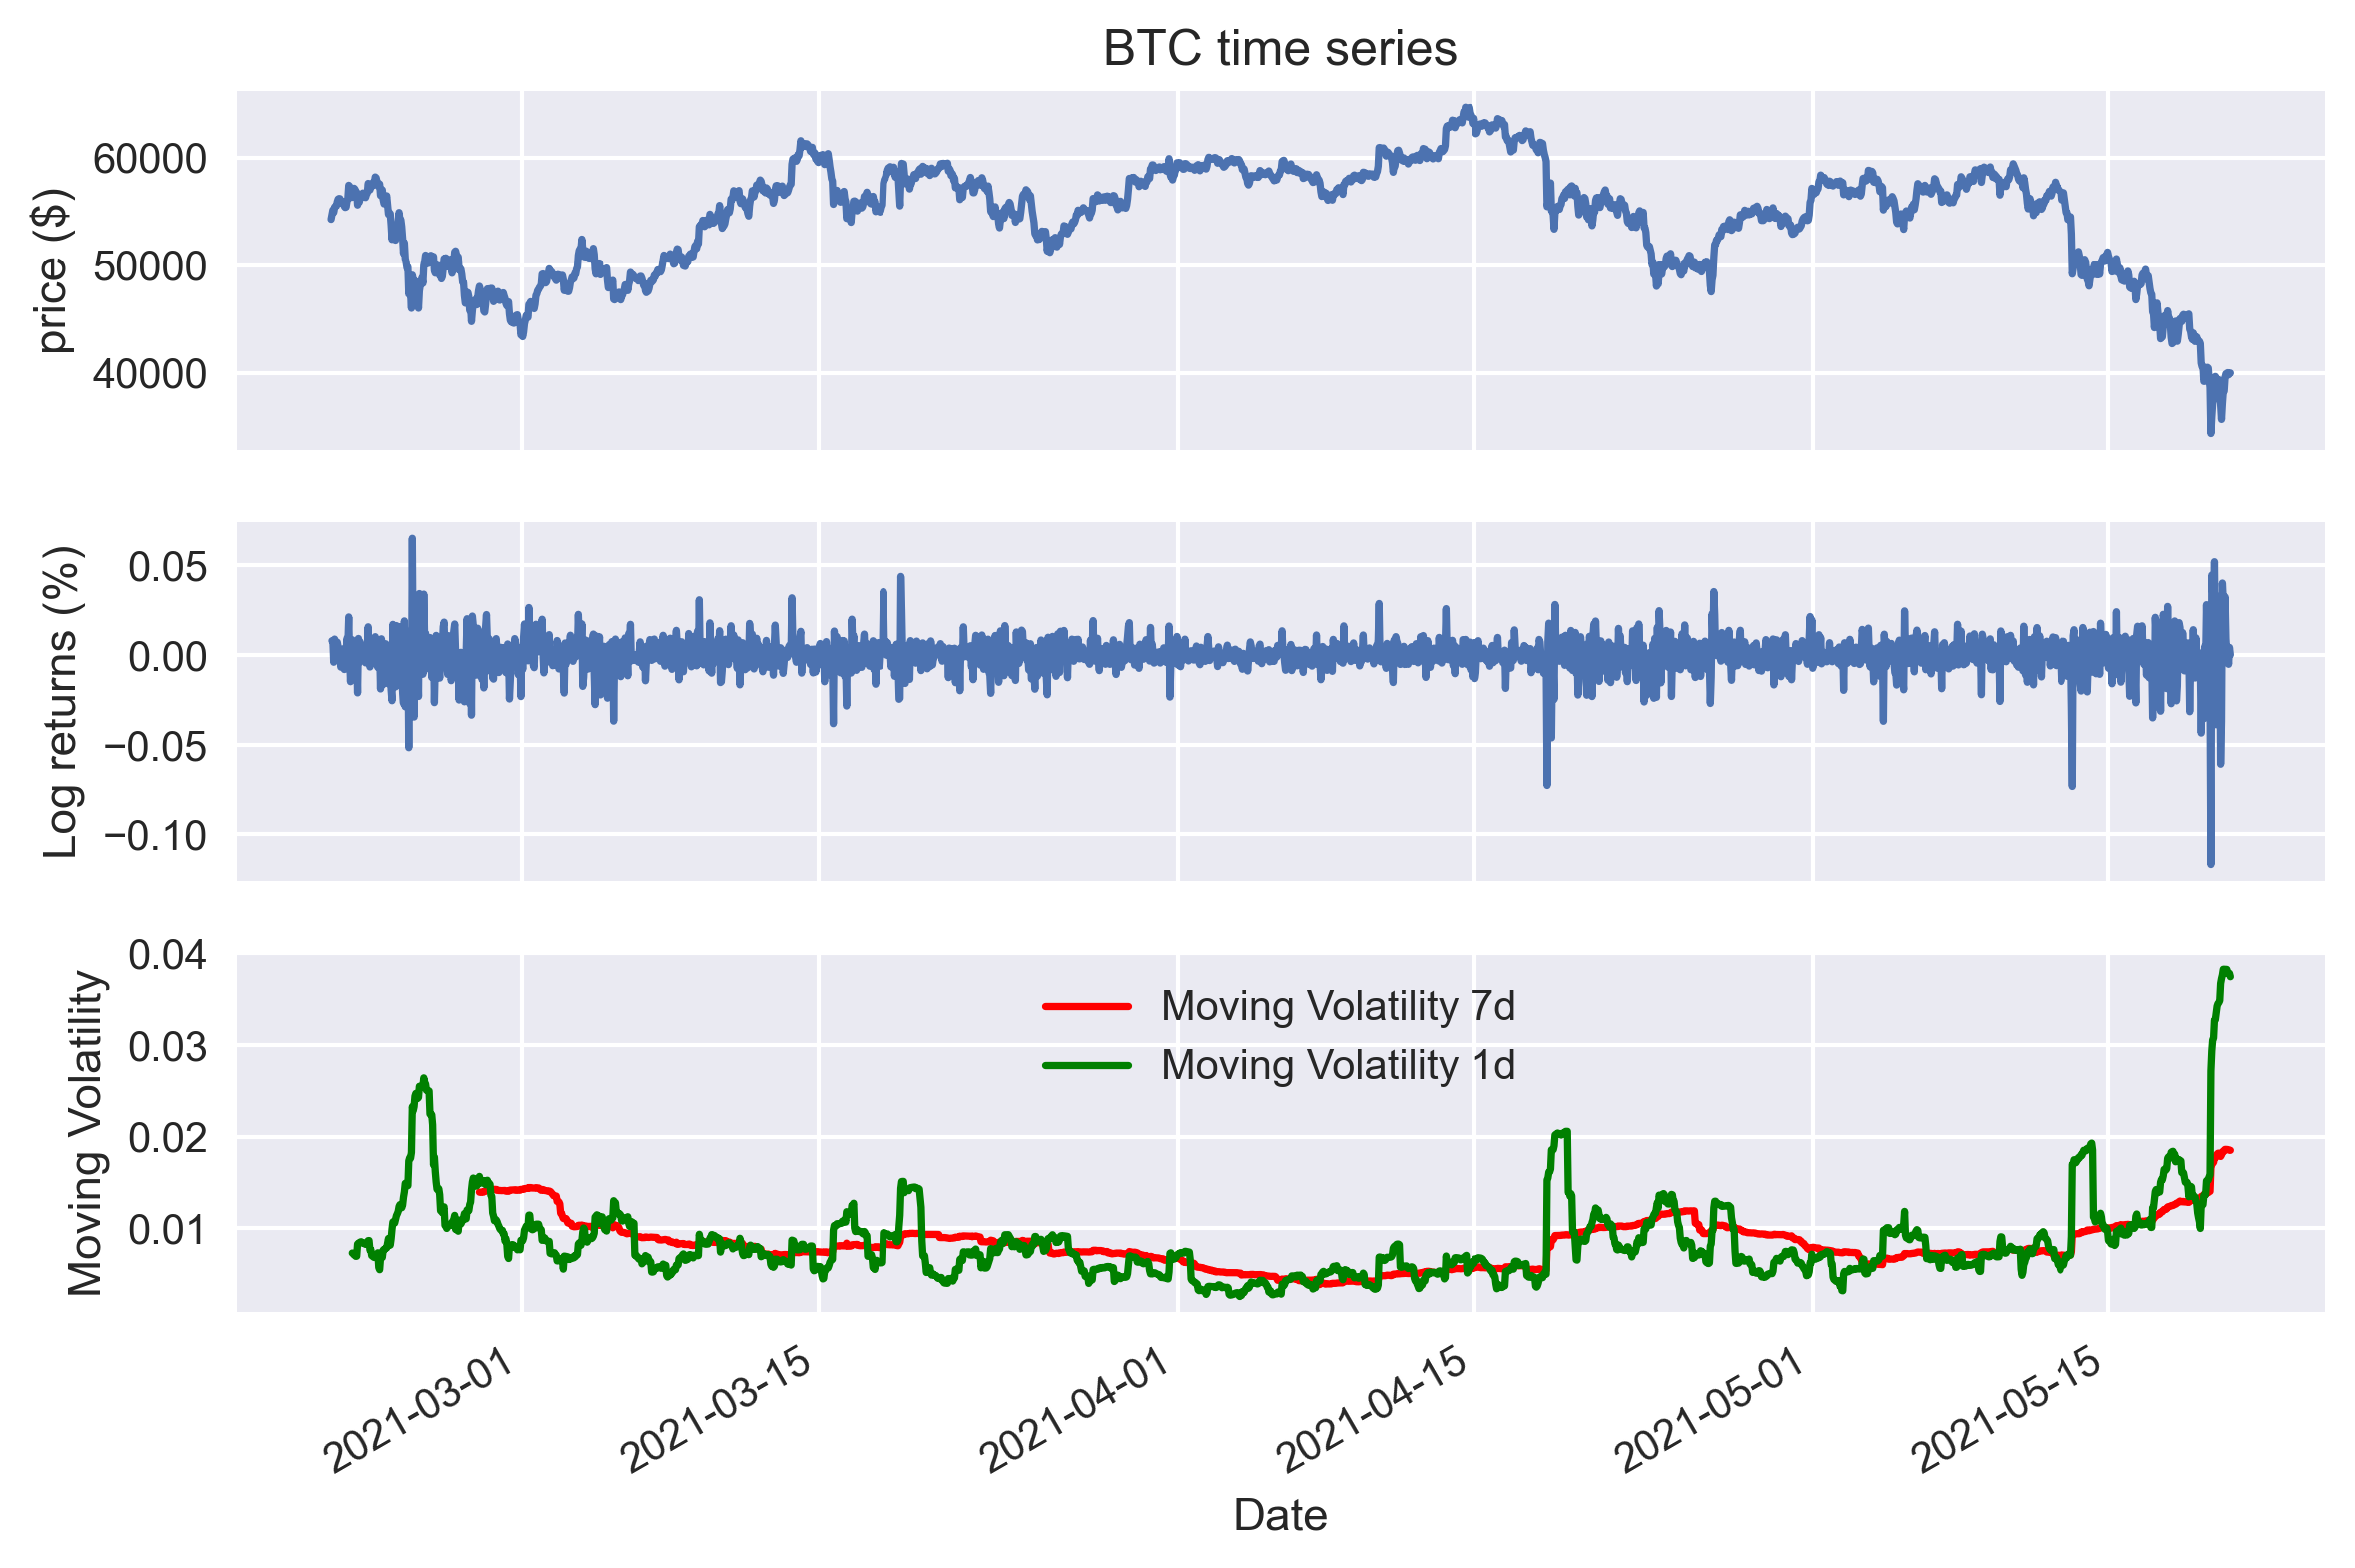

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(9, 6),sharex=True)
data.Close.plot(ax=ax[0])
ax[0].set(title='BTC time series',
ylabel='price ($)')
data.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
data.moving_std_7d.plot(ax=ax[2], color='r',
label='Moving Volatility 7d')
data.moving_std_1d.plot(ax=ax[2], color='g',
label='Moving Volatility 1d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

## 觉得有用就请——
# <font color=#FF0000> 关注、支持、点赞、收藏吧</font>